In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Churn_Modelling.csv')
df = pd.DataFrame(data)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#add flag attrition

df['AttritionFlag'] = df['Exited'].replace({0:'Existed',1:'Attrited'})

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data = df[['CreditScore',	'Geography',	'Gender',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary', 'Exited']]

#Data Distribution

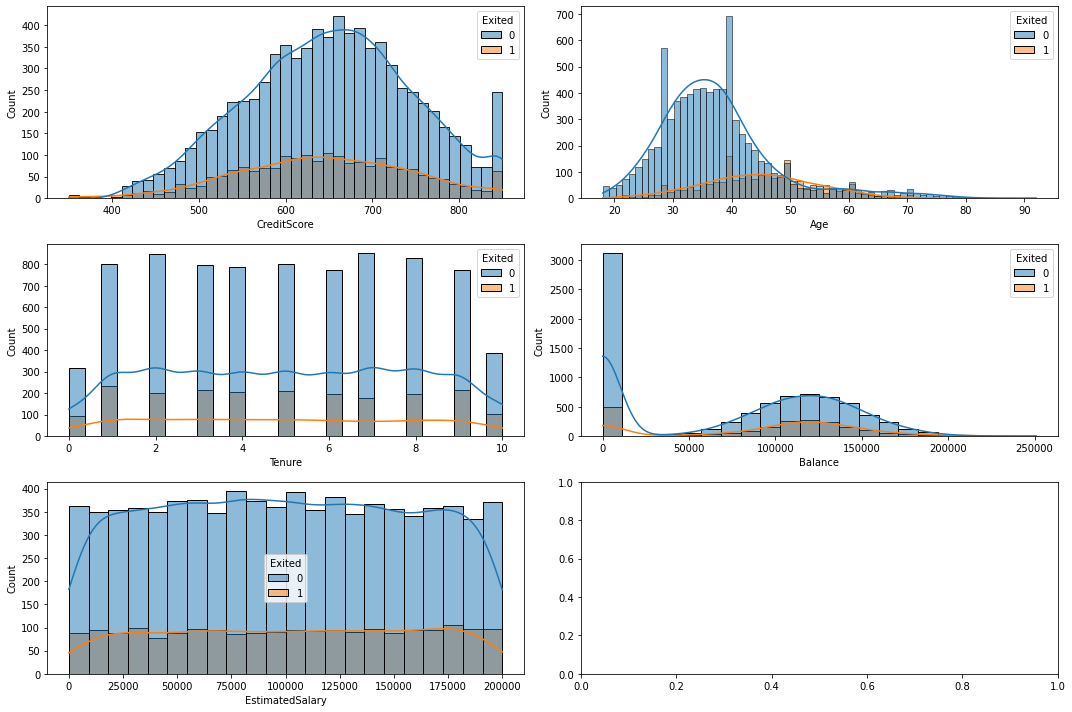

In [ ]:
cols = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(0, len(cols)):
    plt.sca(axes[i]) # set the current Axes
    sns.histplot(data=data, x=cols[i], kde=True, hue='Exited')
    # plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

plt.tight_layout()

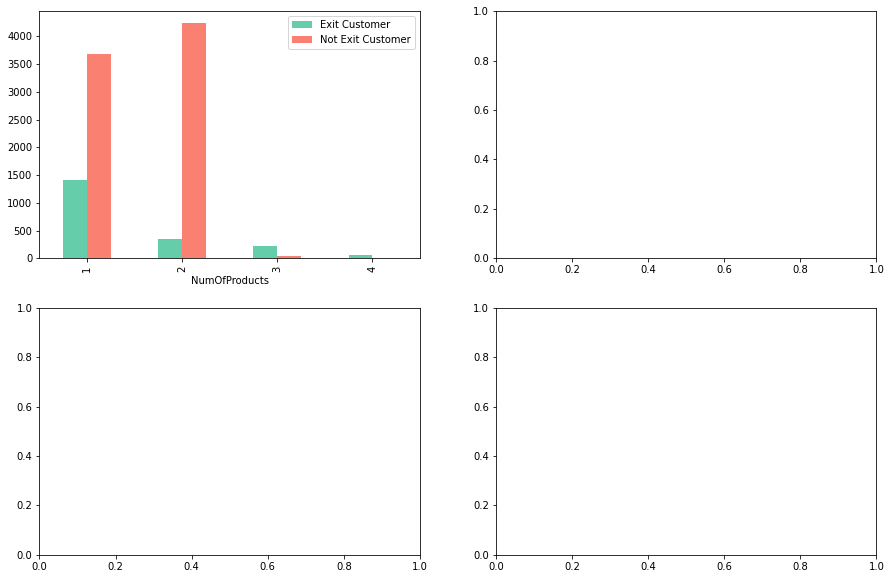

In [ ]:
cols = ["NumOfProducts"]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes = axes.flatten() # reshape from 3x4 array into 12-element vector

for i in range(0, len(cols)):
  discrete_data = pd.DataFrame({
    "Exit Customer": df[cols[i]][(df.Exited == 1)].value_counts(),
    "Not Exit Customer": df[cols[i]][(df.Exited == 0)].value_counts()
    })
  discrete_data.plot(kind='bar', ax=axes[i], color=["mediumaquamarine", "salmon"])
  axes[i].set_xlabel("Counts")
  axes[i].set_xlabel(cols[i])

# Categorical Data

,Exited,Percentage
0,0,0.7963
1,1,0.2037


,Geography,Percentage
0,France,0.5014
1,Germany,0.2509
2,Spain,0.2477


,Gender,Percentage
0,Male,0.5457
1,Female,0.4543


,HasCrCard,Percentage
0,1,0.7055
1,0,0.2945


,IsActiveMember,Percentage
0,1,0.5151
1,0,0.4849


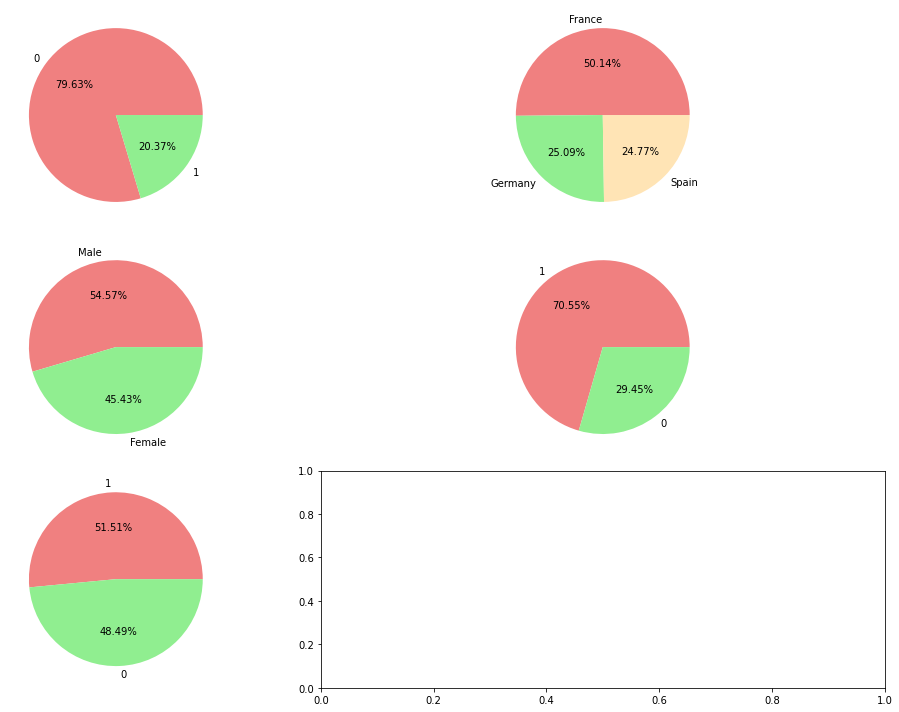

In [ ]:
cols = ["Exited","Geography",	"Gender","HasCrCard", "IsActiveMember"]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes = axes.flatten()

cdict = {0: 'lightcoral', 1: 'lightgreen', 2: 'moccasin', 3: 'paleturquoise', 4:'lightskyblue', 5: 'plum', 6:'pink'}

for i in range(0, len(cols)):
  cont_data = pd.DataFrame({
    "Percentage": df[cols[i]].value_counts(normalize=True)
    })
  cont_data_v2 = cont_data.rename_axis(cols[i]).reset_index()
  display(cont_data_v2)
  colors = [cdict[x] for x in cont_data_v2.index]
  cont_data.plot(kind='pie', ax=axes[i], colors=colors, subplots=True, autopct='%1.2f%%', legend=False, textprops=dict(color="black", size=10))
  axes[i].set_ylabel("")

plt.tight_layout()

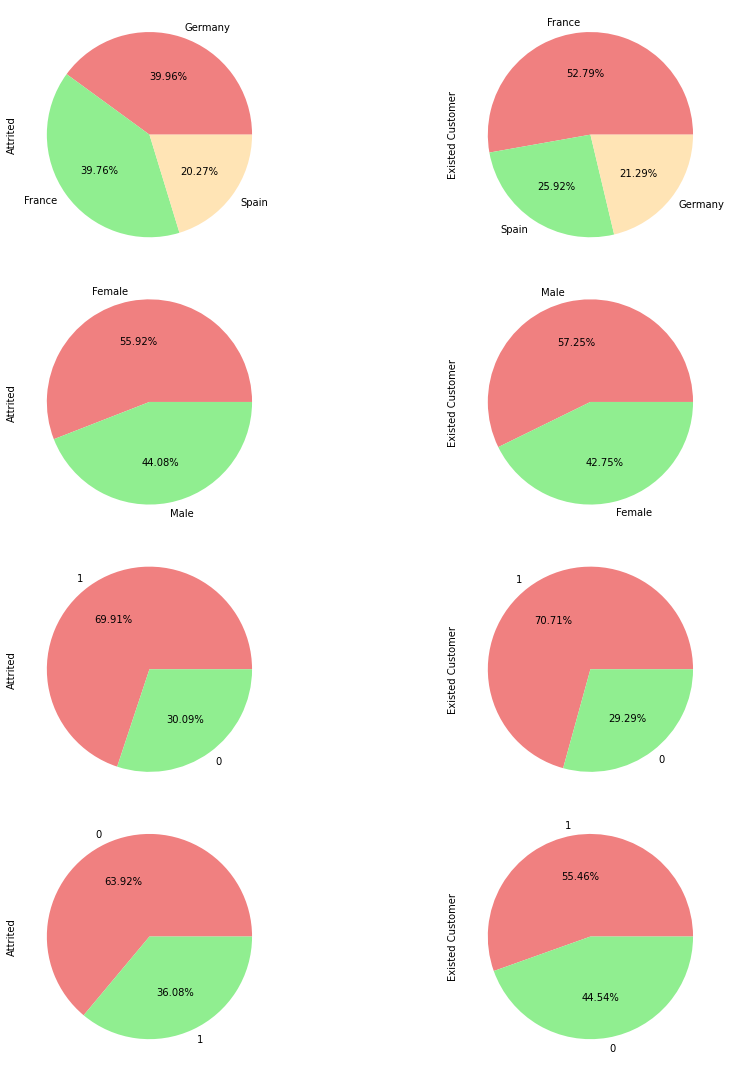

In [ ]:
cols = ["Geography","Gender","HasCrCard", "IsActiveMember"]

fig, axes = plt.subplots(4, 2, figsize=(15, 15))

axes = axes.flatten()

cdict = {0: 'lightcoral', 1: 'lightgreen', 2: 'moccasin', 3: 'paleturquoise', 4:'lightskyblue', 5: 'plum', 6:'pink'}
axes_count = 0
for i in range(0, len(cols)):
  attr_df = df[(df.AttritionFlag == "Attrited")]
  attr_df.head()
  attr_cont_data = pd.DataFrame({
    "Percentage": attr_df[cols[i]].value_counts(normalize=True)
  })
  attr_cont_data_v2 = attr_cont_data.rename_axis(cols[i]).reset_index()
  attr_colors = [cdict[x] for x in attr_cont_data_v2.index]
  attr_cont_data.plot(kind='pie', ax=axes[axes_count], colors=attr_colors, subplots=True, autopct='%1.2f%%', legend=False, textprops=dict(color="black", size=10))
  axes[axes_count].set_ylabel("Attrited")
  axes_count += 1

  exist_df = df[(df.AttritionFlag == "Existed")]
  exist_cont_data = pd.DataFrame({
    "Percentage": exist_df[cols[i]].value_counts(normalize=True)
    })
  exist_cont_data_v2 = exist_cont_data.rename_axis(cols[i]).reset_index()
  exist_colors = [cdict[x] for x in exist_cont_data_v2.index]
  exist_cont_data.plot(kind='pie', ax=axes[axes_count], colors=exist_colors, subplots=True, autopct='%1.2f%%', legend=False, textprops=dict(color="black", size=10))
  axes[axes_count].set_ylabel("Existed Customer")
  axes_count += 1

plt.tight_layout()

#Scaterplot

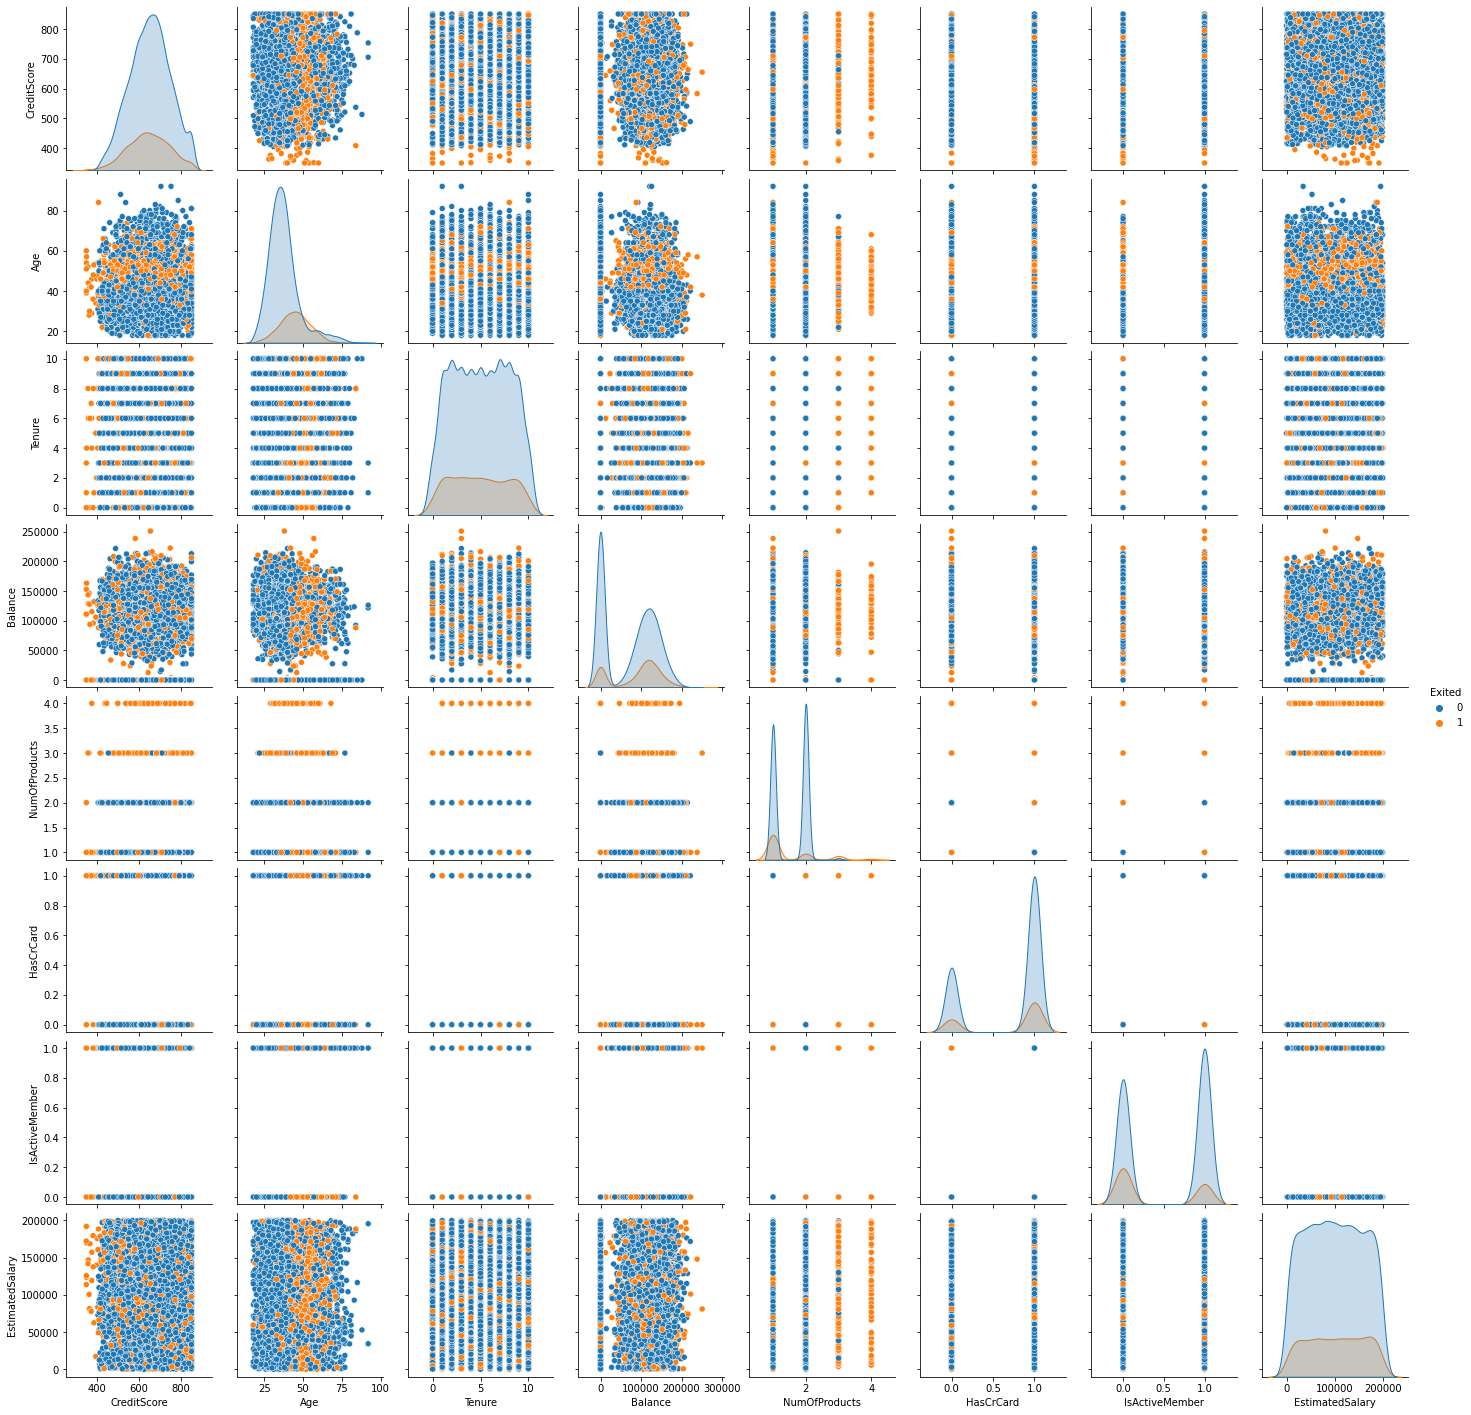

In [ ]:
sns.pairplot(data, hue='Exited')
plt.show()

#Age and Credit Score

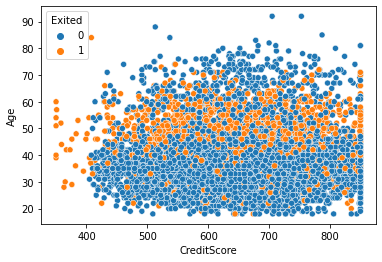

In [ ]:
sns.scatterplot(data=data,x="CreditScore",y="Age",hue="Exited")

#Age and Balance

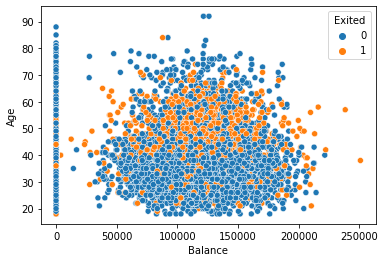

In [ ]:
sns.scatterplot(data=data,x="Balance",y="Age",hue="Exited")

##Age and Estimated Sallary

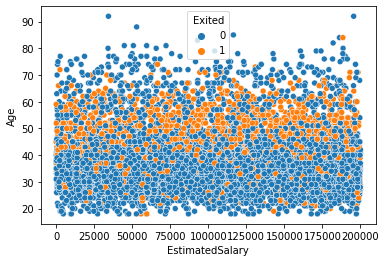

In [ ]:
sns.scatterplot(data=data,x="EstimatedSalary",y="Age",hue="Exited")

##Age and Tenure

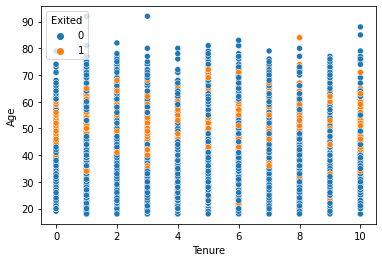

In [ ]:
sns.scatterplot(data=data,x="Tenure",y="Age",hue="Exited")

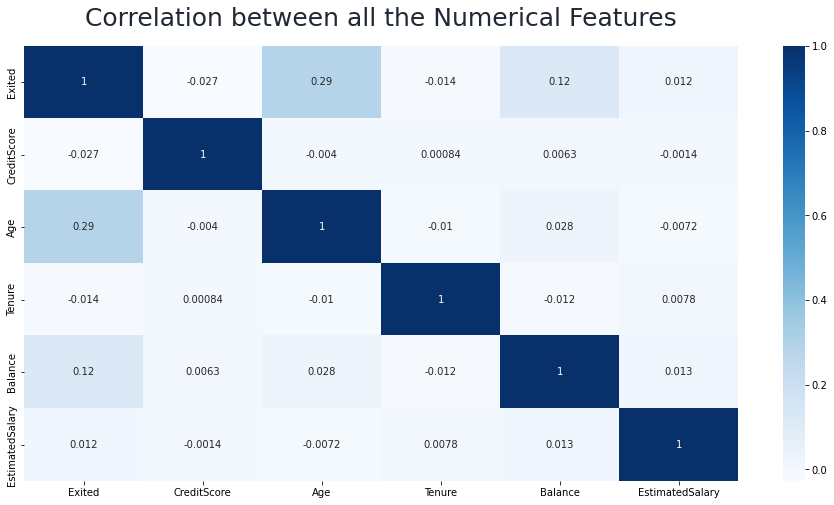

In [10]:
df_numerical = df[["Exited","CreditScore","Age","Tenure","Balance","EstimatedSalary"]]

heat = df_numerical.corr()
plt.figure(figsize=[16,8])
plt.title("Correlation between all the Numerical Features", size=25, pad=20, color='#1f2833')
sns.heatmap(heat, cmap='Blues', annot=True)
plt.show()

In [29]:
df_age = df[(df["Age"] >= 40) & (df["Age"] < 60)]

In [28]:
df[df["Age"] < 40]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [31]:
is_exit = df_age["Exited"] == 1
is_exit.value_counts()

False    2194
True     1293
Name: Exited, dtype: int64

In [32]:
df_age["Exited"].sum()

1293

In [33]:
df_age["Exited"].count()

3487

In [36]:
df_age[df_age["CreditScore"] > 600]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,9980,15692664,Diribe,677,France,Female,58,1,90022.85,1,0,1,2988.28,0
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9983,9984,15656710,Cocci,613,France,Male,40,4,0.00,1,0,0,151325.24,0
9986,9987,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0


In [38]:
df_age[(df_age["CreditScore"] > 600) & (df_age["Exited"] == 1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
43,44,15755196,Lavine,834,France,Female,49,2,131394.56,1,0,0,194365.76,1
53,54,15702298,Parkhill,655,Germany,Male,41,8,125561.97,1,0,0,164040.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,9935,15774586,West,692,Germany,Female,43,10,118588.83,1,1,1,161241.65,1
9962,9963,15594612,Flynn,702,Spain,Male,44,9,0.00,1,0,0,59207.41,1
9975,9976,15666295,Smith,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1


In [39]:
df_age[(df_age["CreditScore"] > 600) & (df_age["Exited"] == 0)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
15,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
20,21,15577657,McDonald,732,France,Male,41,8,0.00,2,1,1,170886.17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,9970,15806360,Hou,609,France,Male,41,6,0.00,1,0,1,112585.19,0
9978,9979,15703563,P'eng,774,France,Male,40,9,93017.47,2,1,0,191608.97,0
9979,9980,15692664,Diribe,677,France,Female,58,1,90022.85,1,0,1,2988.28,0
9983,9984,15656710,Cocci,613,France,Male,40,4,0.00,1,0,0,151325.24,0


In [42]:
import plotly.express as px
data = dict(
    number=[3487, 2419, 866],
    stage=["Customer Age 40-60", "High Credit Score", "Exit"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

In [43]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnelarea(
      values = [3487, 2419, 866], text = ["Customer Age 40-60", "High Credit Score", "Exit"],
      marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat"], "width": [0, 1, 5, 0, 4]}},
      textfont = {"family": "Old Standard TT, serif", "size": 13, "color": "black"}, opacity = 0.65))
fig.show()

In [44]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ["Customer Age 40-60", "High Credit Score", "Exit"],
    x = [3487, 2419, 866],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()